In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6
plt.style.use('fivethirtyeight')

In [9]:
df=pd.read_csv('SBIN97-19.csv',index_col='Date',parse_dates=True)

In [10]:
df.dropna(inplace=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-24,21.111300,21.408501,20.922600,21.186800,0.574788,89009163.0
1996-12-26,21.446199,22.356701,21.446199,22.262400,0.603969,114648766.0
1996-12-31,22.403900,22.545401,21.960400,22.050100,0.598209,65269358.0
1997-01-01,22.503000,23.531401,22.503000,23.380400,0.634300,117594117.0
1997-01-02,23.493700,23.507799,22.672800,22.743601,0.617023,118900924.0


In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-24,21.111300,21.408501,20.922600,21.186800,0.574788,89009163.0
1996-12-26,21.446199,22.356701,21.446199,22.262400,0.603969,114648766.0
1996-12-31,22.403900,22.545401,21.960400,22.050100,0.598209,65269358.0
1997-01-01,22.503000,23.531401,22.503000,23.380400,0.634300,117594117.0
1997-01-02,23.493700,23.507799,22.672800,22.743601,0.617023,118900924.0


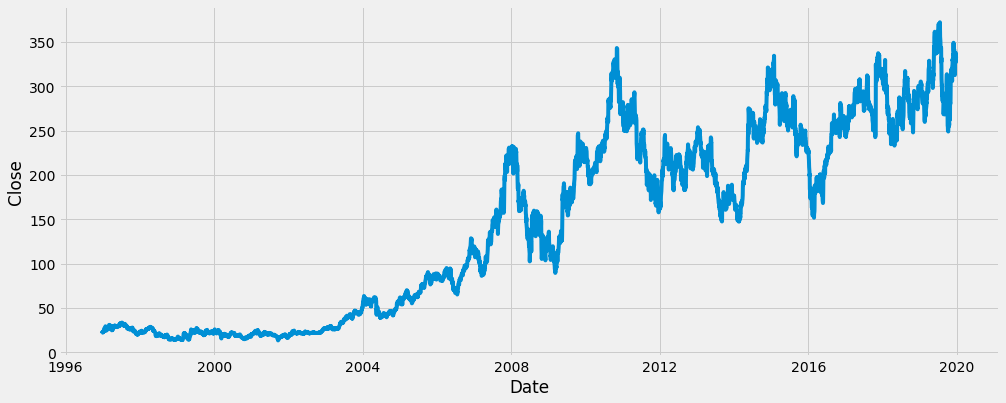

In [12]:
plt.xlabel('Date')
plt.ylabel("Close")
plt.plot(df['Close']);

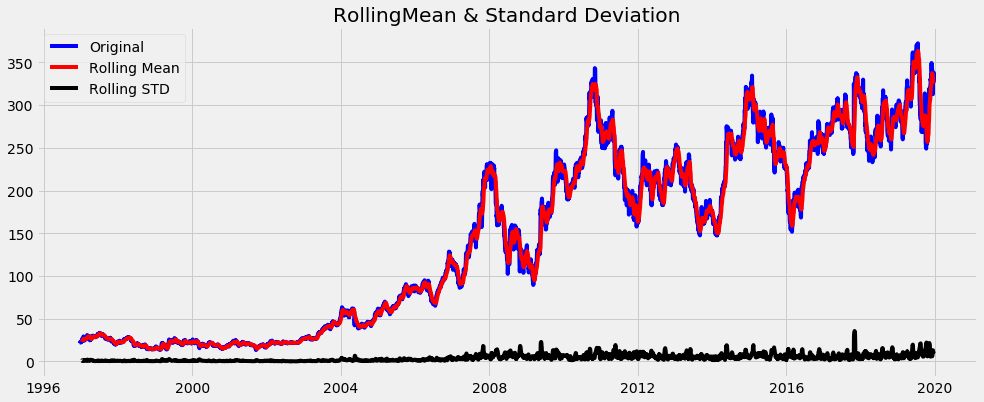

In [16]:
# Determine Rolling Statistics
ma=df['Close'].rolling(window=12).mean()
mstd=df['Close'].rolling(window=12).std()
#Plot Rolling Statistics
orig=plt.plot(df['Close'],color='blue',label='Original')
mean=plt.plot(ma,color='red',label='Rolling Mean')
std=plt.plot(mstd,color='black',label='Rolling STD')
plt.legend(loc='best')
plt.title('RollingMean & Standard Deviation')
plt.show(block=False)    

In [20]:
#Perform Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller   
print("Result of dickyfuller test")
dftest=adfuller(df['Close'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p value','#lag used','No. of observation'])
for key,value in dftest[4].items():
        dfoutput['Critical value(%s)'%key]=value
print(dfoutput)

Result of dickyfuller test
Test Statistics          -1.135750
p value                   0.700607
#lag used                24.000000
No. of observation     5650.000000
Critical value(1%)       -3.431508
Critical value(5%)       -2.862052
Critical value(10%)      -2.567042
dtype: float64


In [126]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    # Determine Rolling Statistics
    
    ma=timeseries.rolling(window=12).mean()
    mstd=timeseries.rolling(window=12).std()
    
    
    #Plot Rolling Statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(ma,color='red',label='Rolling Mean')
    std=plt.plot(mstd,color='black',label='Rolling STD')
    
    plt.legend(loc='best')
     
    plt.title('RollingMean & Standard Deviation')
    
    plt.show(block=False)
   
    #Perform Dickey-Fuller Test
   
    print("Result of dickyfuller test")
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p value','#lag used','No. of observation'])
    for key,value in dftest[4].items():
        dfoutput['Critical value(%s)'%key]=value
    print(dfoutput)

In [21]:
#test_stationary(df['Close'])

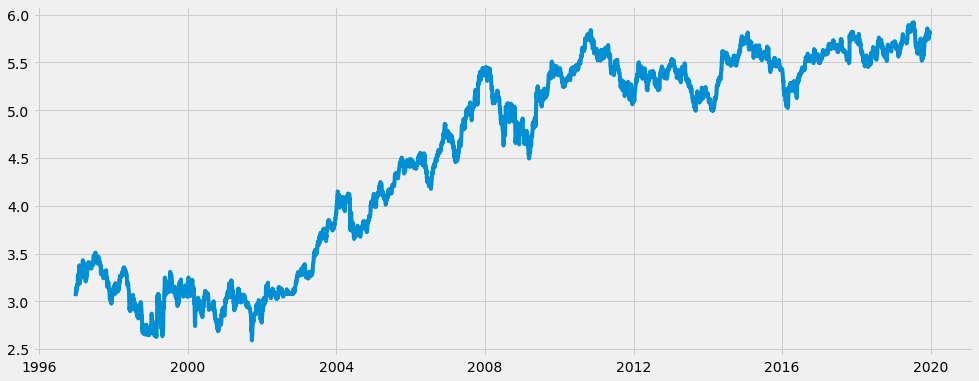

In [128]:
#Estimate the trend
ts_log = np.log(df['Close'])
plt.plot(ts_log);

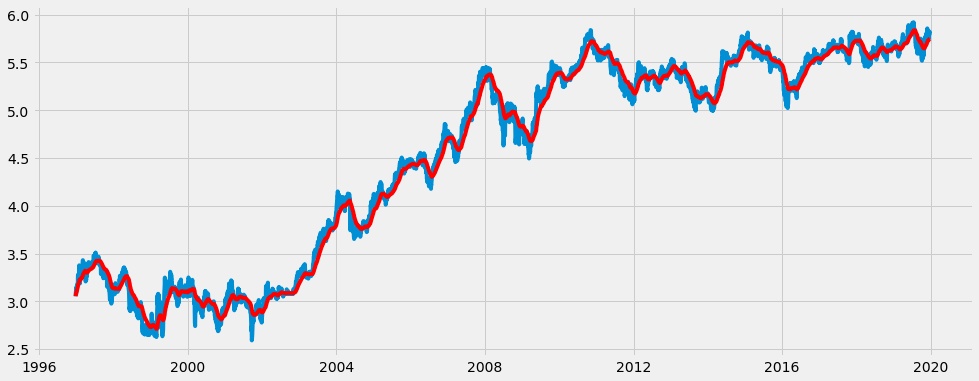

In [130]:
#Weighted Mean
exp_weigh_avg=ts_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(ts_log)
plt.plot(exp_weigh_avg,color='red');


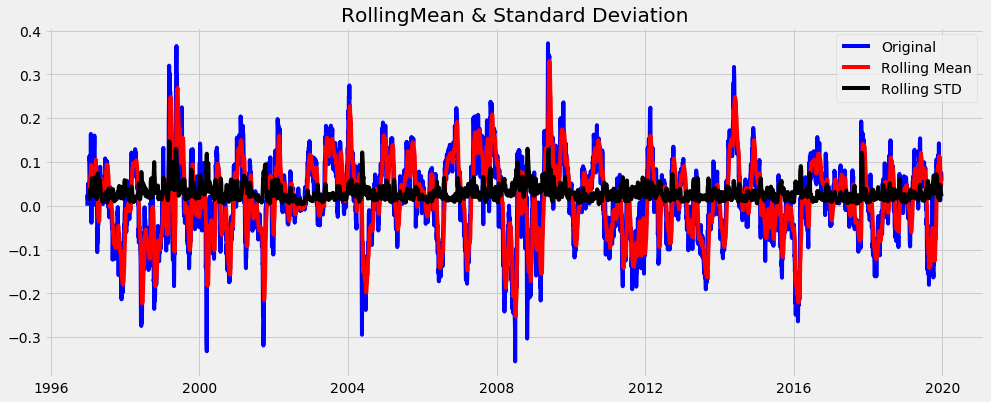

Result of dickyfuller test
Test Statistics       -9.788611e+00
p value                6.442810e-17
#lag used              1.000000e+01
No. of observation     5.664000e+03
Critical value(1%)    -3.431505e+00
Critical value(5%)    -2.862050e+00
Critical value(10%)   -2.567042e+00
dtype: float64


In [131]:
ts_log_exp_weigh_avg=ts_log-exp_weigh_avg
test_stationary(ts_log_exp_weigh_avg)

In [132]:
#Eliminating trend and seasonality

log_diff_shift=ts_log-ts_log.shift()

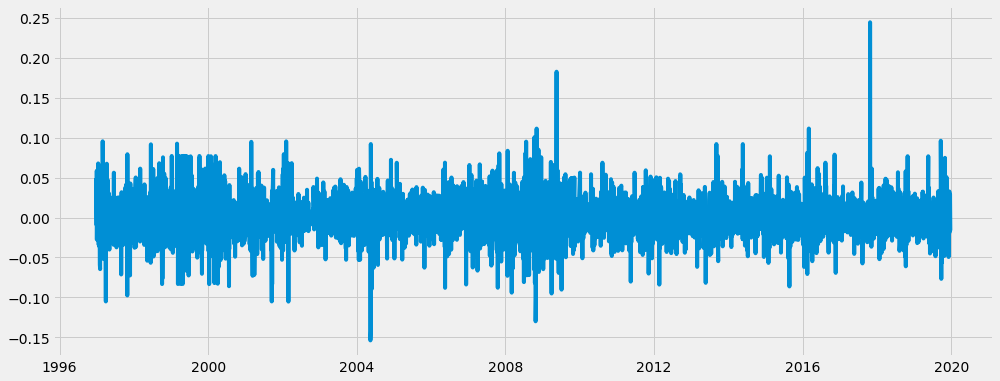

In [133]:
plt.plot(log_diff_shift);

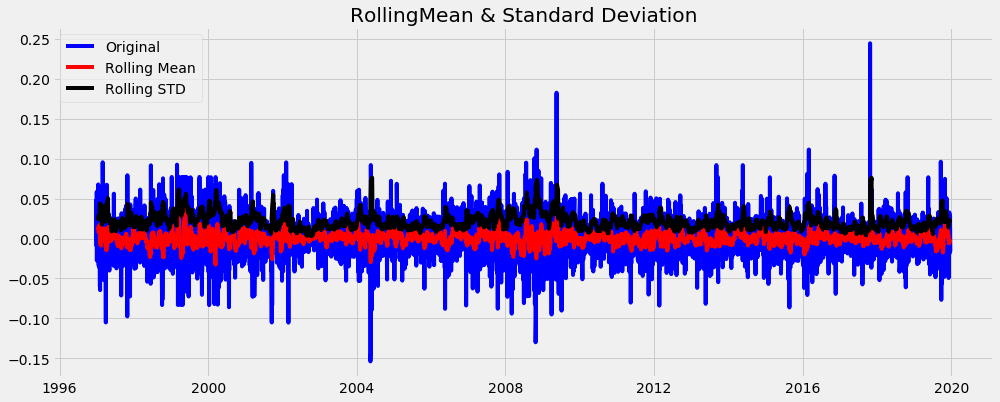

Result of dickyfuller test
Test Statistics         -26.344259
p value                   0.000000
#lag used                 7.000000
No. of observation     5666.000000
Critical value(1%)       -3.431505
Critical value(5%)       -2.862050
Critical value(10%)      -2.567042
dtype: float64


In [134]:
log_diff_shift.dropna(inplace=True)
test_stationary(log_diff_shift)

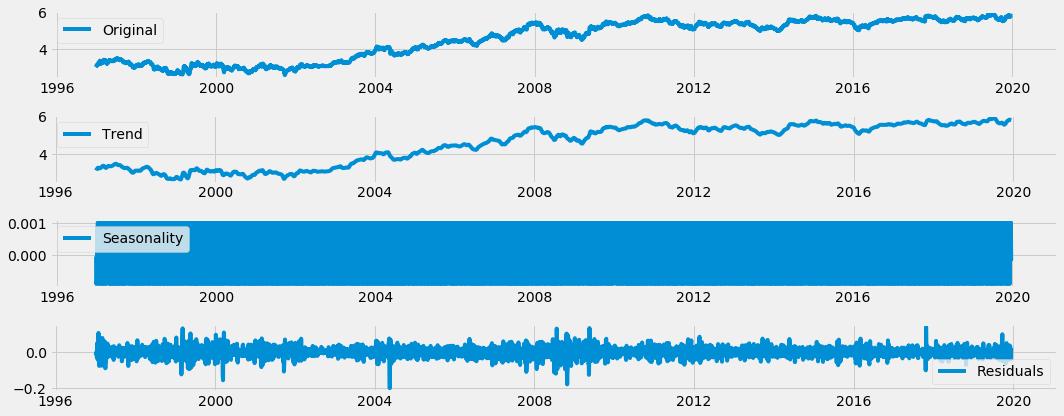

In [135]:
#ETS Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

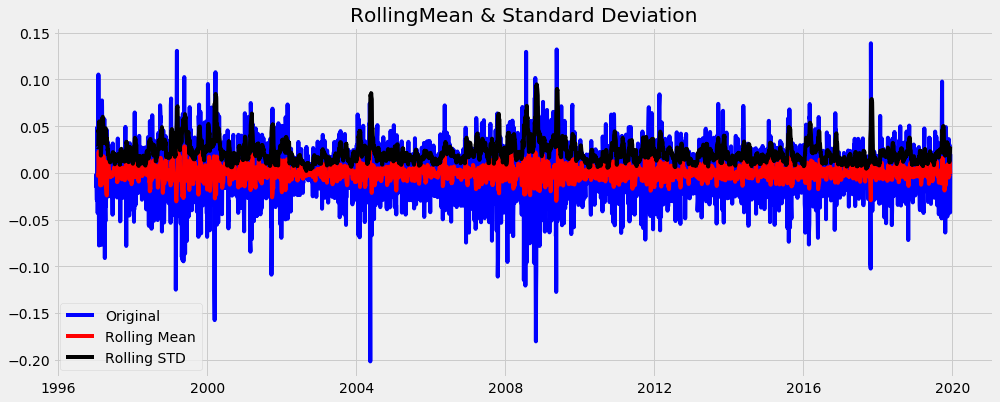

Result of dickyfuller test
Test Statistics         -21.453425
p value                   0.000000
#lag used                33.000000
No. of observation     5629.000000
Critical value(1%)       -3.431512
Critical value(5%)       -2.862054
Critical value(10%)      -2.567043
dtype: float64


In [136]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationary(ts_log_decompose)

In [137]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [138]:
lag_acf = acf(log_diff_shift, nlags=20)
lag_pacf = pacf(log_diff_shift, nlags=20, method='ols')

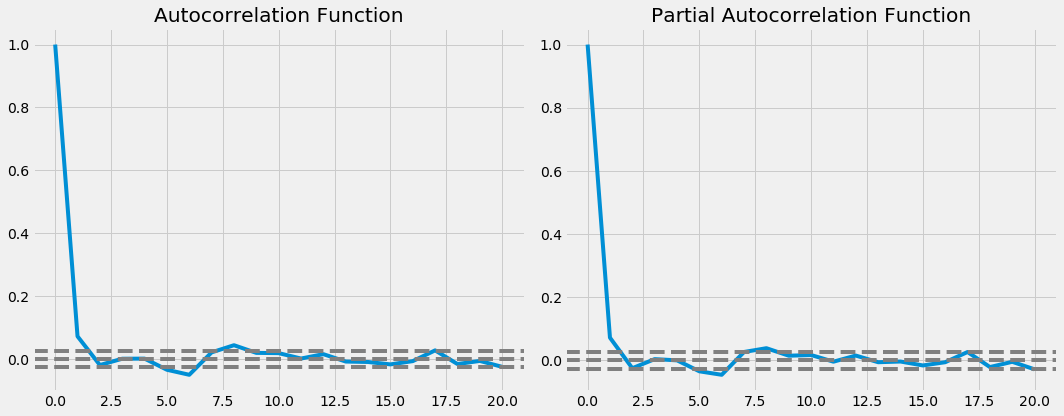

In [139]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_diff_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_diff_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_diff_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_diff_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
## AR MODEL
import warnings
warnings.simplefilter(action='ignore')
model = ARIMA(ts_log, order=(3, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(log_diff_shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-log_diff_shift)**2));

NameError: name 'ts_log' is not defined

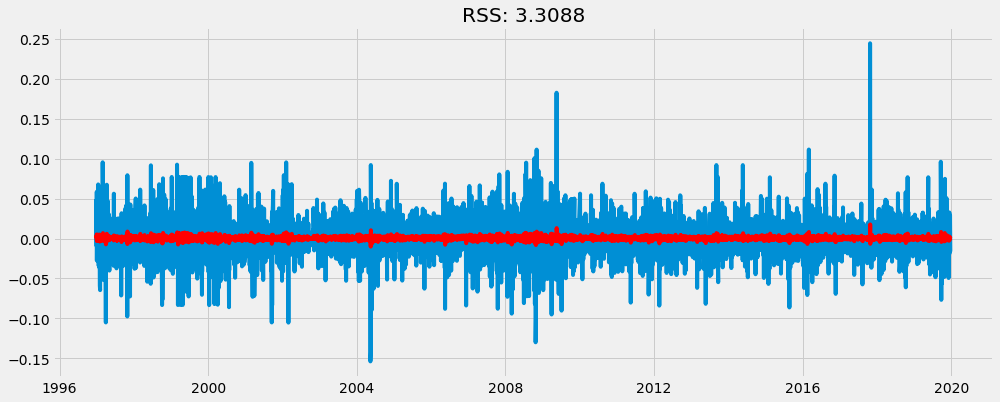

In [142]:
##  MA MODEL

import warnings
warnings.simplefilter(action='ignore')
model = ARIMA(ts_log, order=(0,1,2))  
results_MA = model.fit(disp=-1)
plt.plot(log_diff_shift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-log_diff_shift)**2));

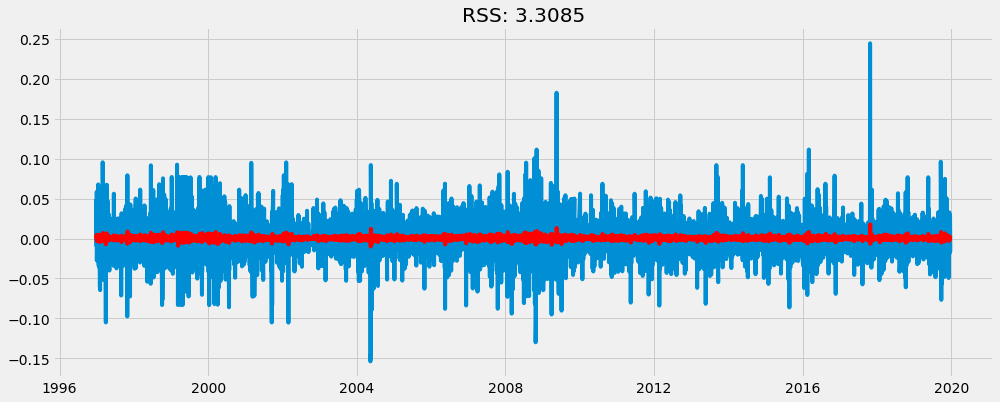

In [143]:
##COMBINED MODEL

import warnings
warnings.simplefilter(action='ignore')
model = ARIMA(ts_log, order=(1, 1,2))
results_ARIMA = model.fit(disp=-1) 
plt.plot(log_diff_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_diff_shift)**2));


In [144]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
1996-12-26    0.000485
1996-12-31    0.004029
1997-01-01   -0.001442
1997-01-02    0.004592
1997-01-03   -0.003181
dtype: float64


In [145]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
1996-12-26    0.000485
1996-12-31    0.004514
1997-01-01    0.003073
1997-01-02    0.007665
1997-01-03    0.004483
dtype: float64


In [146]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1996-12-24    3.053378
1996-12-26    3.053863
1996-12-31    3.057893
1997-01-01    3.056451
1997-01-02    3.061043
dtype: float64

In [147]:
'''predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df['Close'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df['Close'])**2)/len(df['Close'])))'''

"predictions_ARIMA = np.exp(predictions_ARIMA_log)\nplt.plot(df['Close'])\nplt.plot(predictions_ARIMA)\nplt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df['Close'])**2)/len(df['Close'])))"

Text(0.5, 1.0, 'SBI Stock Price Prediction')

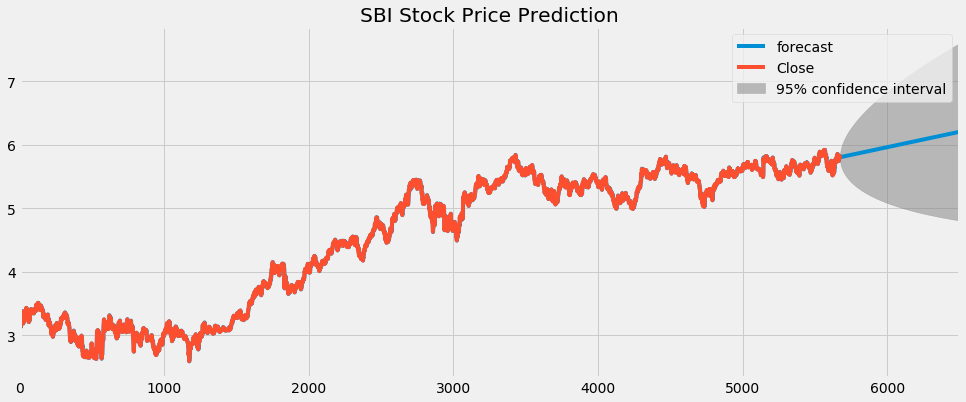

In [148]:

results_ARIMA.plot_predict(1,6500);
plt.title('SBI Stock Price Prediction')

In [149]:
y=6500-5666
print(y)
x=results_ARIMA.forecast(steps=y)
print(x)

834
(array([5.80493227, 5.80544946, 5.80595436, 5.80645166, 5.80694425,
       5.80743393, 5.80792181, 5.80840858, 5.80889466, 5.80938031,
       5.8098657 , 5.81035092, 5.81083604, 5.8113211 , 5.81180612,
       5.81229112, 5.8127761 , 5.81326108, 5.81374605, 5.81423101,
       5.81471597, 5.81520093, 5.81568589, 5.81617085, 5.81665581,
       5.81714077, 5.81762573, 5.81811069, 5.81859564, 5.8190806 ,
       5.81956556, 5.82005052, 5.82053548, 5.82102044, 5.8215054 ,
       5.82199035, 5.82247531, 5.82296027, 5.82344523, 5.82393019,
       5.82441515, 5.8249001 , 5.82538506, 5.82587002, 5.82635498,
       5.82683994, 5.8273249 , 5.82780986, 5.82829481, 5.82877977,
       5.82926473, 5.82974969, 5.83023465, 5.83071961, 5.83120456,
       5.83168952, 5.83217448, 5.83265944, 5.8331444 , 5.83362936,
       5.83411432, 5.83459927, 5.83508423, 5.83556919, 5.83605415,
       5.83653911, 5.83702407, 5.83750902, 5.83799398, 5.83847894,
       5.8389639 , 5.83944886, 5.83993382, 5.84041877, 5.